In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('./bundesliga_player.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

In [176]:
df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [177]:
df.columns

Index(['Unnamed: 0', 'name', 'full_name', 'age', 'height', 'nationality',
       'place_of_birth', 'price', 'max_price', 'position', 'shirt_nr', 'foot',
       'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter'],
      dtype='object')

In [178]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [179]:
df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [180]:
df.isnull().sum()

name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

In [181]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [182]:
percent_missing(df)

place_of_birth       0.970874
price                0.970874
max_price            0.970874
foot                 1.747573
player_agent         5.242718
contract_expires     6.601942
full_name           55.533981
outfitter           62.524272
dtype: float64

#Let's fill the null value of full_name with name field, in this way we can get rid of the null value present in full_name column 

In [183]:
df['full_name'].fillna(df['name'], inplace=True)

In [184]:
percent_missing(df)

place_of_birth       0.970874
price                0.970874
max_price            0.970874
foot                 1.747573
player_agent         5.242718
contract_expires     6.601942
outfitter           62.524272
dtype: float64

Let's do the same with the place_of_birth column

In [185]:
df['place_of_birth'].fillna(df['nationality'], inplace=True)

In [186]:
percent_missing(df)

price                0.970874
max_price            0.970874
foot                 1.747573
player_agent         5.242718
contract_expires     6.601942
outfitter           62.524272
dtype: float64

In [187]:
df[df['price'].isnull()]

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
65,Oskar Preil,Oskar Preil,19,1.87,Germany,Germany,NaN,NaN,Goalkeeper,29,right,RB Leipzig,2023-06-30,2022-07-01,SOCCERNATION GROUP,NaN
143,Nacho Ferri,Ignacio Ferri Julià,18,1.92,Spain,Montaverner,NaN,NaN,Attack - Centre-Forward,48,right,E. Frankfurt,2025-06-30,2022-10-05,INVSPORT (Sergio ...,NaN
156,Simon Walde,Simon Walde,18,1.85,Germany,Düsseldorf,NaN,NaN,Defender - Right-Back,45,right,Bor. M'gladbach,2026-06-30,2023-01-04,Wasserman,adidas
301,Mert Kömür,Mert Kömür,17,1.83,Germany Turkey,Dachau,NaN,NaN,midfield - Attacking Midfield,20,both,FC Augsburg U19,2027-06-30,2022-07-01,Agent is known - Player under 18,adidas
377,Elias Bakatukanda,Elias-Geoffrey Bakatukanda,19,1.93,Germany DR Congo,Köln,NaN,NaN,Defender - Centre-Back,5,both,1.FC Köln U19,2026-06-30,2021-07-01,FM Worldsport,NaN


From the Data we can see that they are new player in the tournament

*Process

**We can drop those column (for not having proper values)

**We can fill null values with 0 as they are not having previous record..


In [188]:
df['price'].fillna(0, inplace=True)

In [189]:
df['max_price'].fillna(0, inplace=True)

In [190]:
percent_missing(df)

foot                 1.747573
player_agent         5.242718
contract_expires     6.601942
outfitter           62.524272
dtype: float64

In [191]:
df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,Yann Sommer,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,Sven Ulreich,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [192]:
df[df['foot'].isnull()]

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
3,Johannes Schenk,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.30,0.30,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
101,Ayman Azhil,Ayman Azhil,22,1.75,Morocco Germany,Düsseldorf,0.40,0.40,midfield - Defensive Midfield,32,NaN,B. Leverkusen,2023-06-30,2020-07-01,KL Sportsbase,NaN
132,Mehdi Loune,Mehdi Loune,18,1.72,Germany Morocco,Hanau,0.30,0.30,midfield - Central Midfield,45,NaN,E. Frankfurt,2025-06-30,2022-07-01,Selected ...,Puma
173,Philipp Schulze,Philipp Schulze,20,1.90,Germany,Germany,0.20,0.20,Goalkeeper,35,NaN,VfL Wolfsburg,2026-06-30,2021-07-01,PRO Profil GmbH,adidas
190,Patrick Wimmer,Patrick Wimmer,21,1.82,Austria,Tulln,12.00,12.00,Attack - Right Winger,39,NaN,VfL Wolfsburg,2027-06-30,2022-07-01,More than Sport GmbH,Puma
224,Luca Philipp,Luca Philipp,22,1.92,Germany,Stuttgart,0.30,0.30,Goalkeeper,37,NaN,TSG Hoffenheim,2024-06-30,2020-07-31,Relatives,NaN
339,Thomas Kastanaras,Θωμάς Καστανάρας,20,1.86,Germany Greece,Stuttgart,0.70,0.70,Attack - Centre-Forward,39,NaN,VfB Stuttgart,2025-06-30,2022-07-01,Unique Sports Group,Puma
376,Rijad Smajic,Rijad Smajic,19,1.90,Bosnia-Herzegovina Germany,Köln,0.20,0.20,Defender - Centre-Back,19,NaN,1.FC Köln II,2025-06-30,2022-01-01,OLP Sports,NaN
434,Louis Lord,Louis Lord,19,1.90,Germany,Vechta,0.15,0.15,Goalkeeper,1,NaN,W. Bremen II,NaN,2021-07-01,CAA Stellar,NaN


Thus is the same proble as we discussed before that some newcomer data does not present in the Dataset

so we just can not drop those values with arbitary values

we can classify those null values with some other category

lets name those category 'NotMentioned Foot'

In [193]:
df['foot'].fillna('NotMentioned Foot', inplace=True)

In [194]:
percent_missing(df)

player_agent         5.242718
contract_expires     6.601942
outfitter           62.524272
dtype: float64

In [195]:
df['player_agent'].fillna('No Agent', inplace=True)

In [196]:
percent_missing(df)

contract_expires     6.601942
outfitter           62.524272
dtype: float64

In [197]:
df[df['contract_expires'].isnull()]

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
56,Julien Duranville,Julien Duranville,17,1.70,Belgium,Uccle,5.00,5.00,Attack - Right Winger,16,right,Bor. Dortmund,NaN,2023-01-27,Agent is known - Player under 18,NaN
196,Mark Flekken,Mark Flekken,29,1.95,Netherlands,Bocholtz,7.00,7.00,Goalkeeper,26,both,SC Freiburg,NaN,2018-07-01,SEG,NaN
197,Noah Atubolu,Noah Atubolu,20,1.90,Germany Nigeria,Freiburg im Breisgau,2.00,2.00,Goalkeeper,21,right,SC Freiburg,NaN,2021-07-01,Unique Sports Group,NaN
198,Benjamin Uphoff,Benjamin Uphoff,29,1.92,Germany,Burghausen,0.50,0.60,Goalkeeper,1,right,SC Freiburg,NaN,2020-08-05,Karl M. Herzog ...,NaN
201,Manuel Gulde,Manuel Gulde,32,1.84,Germany,Mannheim,1.70,4.00,Defender - Centre-Back,5,right,SC Freiburg,NaN,2016-07-01,Unique Sports Group,NaN
202,Kenneth Schmidt,Tan-Kenneth Jerico Leka-Schmidt,20,1.87,Germany,Freiburg im Breisgau,0.75,0.75,Defender - Centre-Back,35,left,SC Freiburg,NaN,2023-01-01,Relatives,NaN
203,Christian Günter,Christian Günter,30,1.84,Germany,Villingen-Schwenningen,10.00,12.00,Defender - Left-Back,30,left,SC Freiburg,NaN,2012-07-01,Unique Sports Group,NaN
204,Kimberly Ezekwem,Kimberly Chiwetalu Akwaeze Ezekwem,21,1.87,Germany Nigeria,München,0.35,0.35,Defender - Left-Back,24,left,SC Freiburg,NaN,2021-07-01,CN Sports,NaN
206,Lukas Kübler,Lukas Kübler,30,1.82,Germany,Bonn,3.00,3.00,Defender - Right-Back,17,right,SC Freiburg,NaN,2015-07-01,ROOF,NaN
207,Jonathan Schmid,Jonathan Schmid,32,1.79,France,Strasbourg,1.20,5.00,Defender - Right-Back,7,right,SC Freiburg,NaN,2019-07-01,Unique Sports Group,NaN


In [198]:
df['contract_expires'].fillna('Not Mentioned')

0      2024-06-30
1      2025-06-30
2      2024-06-30
3      2024-06-30
4      2027-06-30
          ...    
510    2024-06-30
511    2024-06-30
512    2024-06-30
513    2023-06-30
514    2026-06-30
Name: contract_expires, Length: 515, dtype: object

In [199]:
df['outfitter'].fillna('No Outfitters')

0             adidas
1               Puma
2             adidas
3      No Outfitters
4             adidas
           ...      
510           adidas
511    No Outfitters
512             Puma
513             Puma
514    No Outfitters
Name: outfitter, Length: 515, dtype: object

In [200]:
df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,Yann Sommer,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,Sven Ulreich,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NotMentioned Foot,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


Let's check the distribution..

<Axes: xlabel='age', ylabel='Count'>

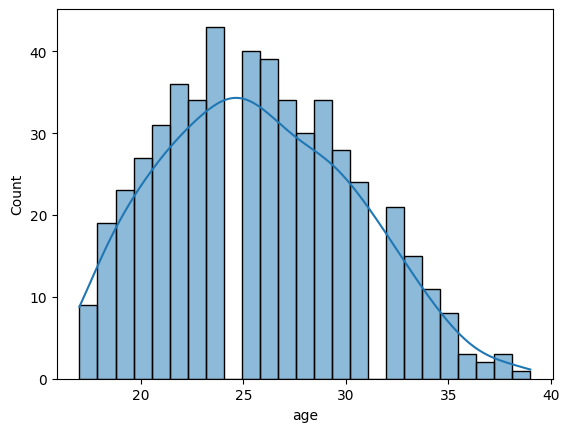

In [201]:
sns.histplot(x='age', data=df, kde=True, bins=25)

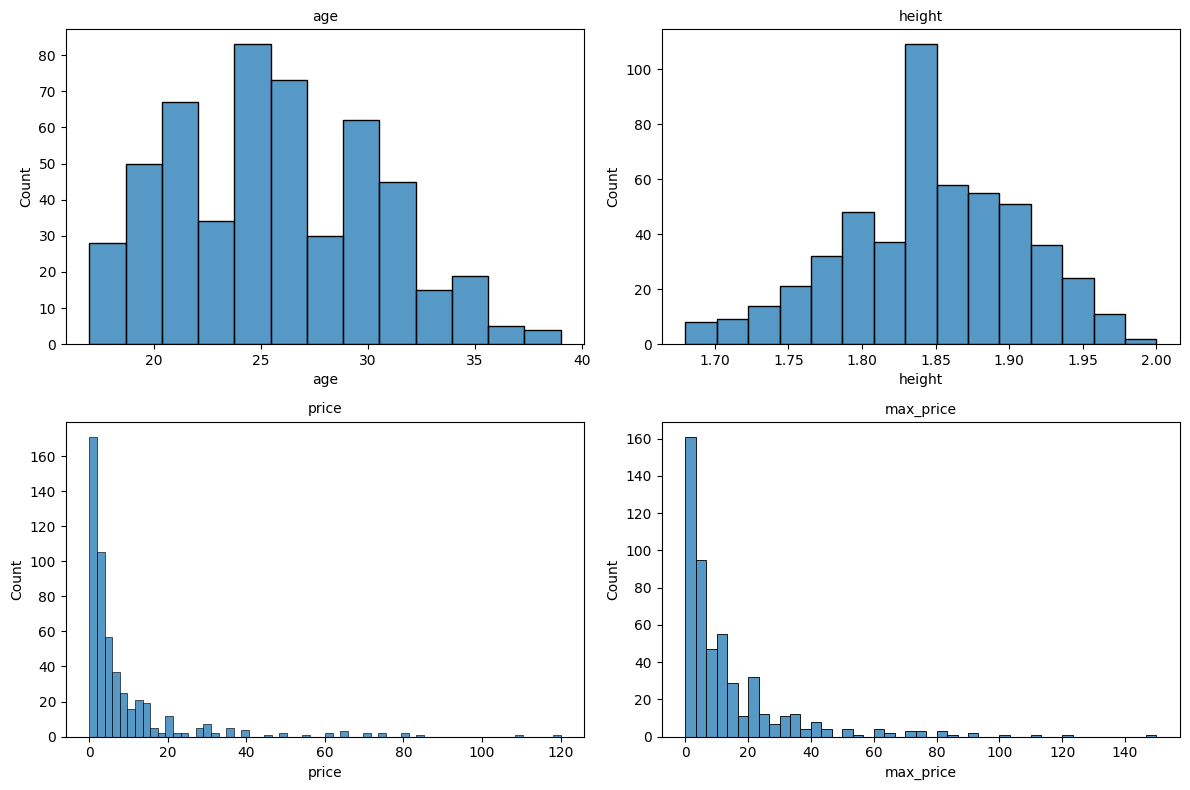

In [202]:
histPlotDistColumn = ['age','height', 'price', 'max_price']
fig,axes = plt.subplots(nrows=len(histPlotDistColumn)//2, ncols=2, figsize=(12,8))

for i,col in enumerate(histPlotDistColumn):
    row_index, col_index = divmod(i, 2) 
    sns.histplot(x=col, data=df, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(col, fontsize=10)
plt.tight_layout()

From the above distribution, we can see that the age and height are moralless normally distributed

But the price and max_price are right sckewed data , lets transform these column

<Axes: xlabel='price', ylabel='Count'>

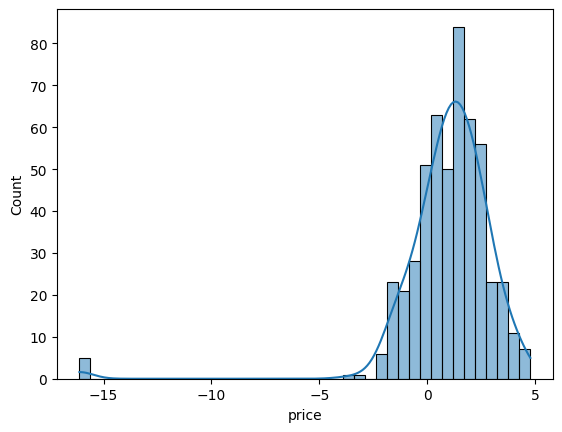

In [208]:
mask = df['price']>0
log_price = np.log(df['price'][mask])
sns.histplot(log_price, kde=True)

<Axes: xlabel='max_price', ylabel='Count'>

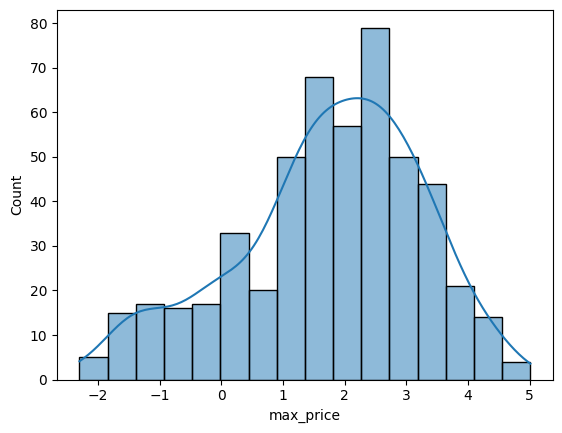

In [209]:
mask2 = df['max_price']>0
log_maxPrice = np.log(df['max_price'][mask2])
sns.histplot(log_maxPrice, kde=True)

Both price and Max-price are now normally distribiuted but for price distribution lokks like the mean is shifted towards left, though it a normal distribution

In [210]:
df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,Yann Sommer,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,Sven Ulreich,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NotMentioned Foot,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [211]:
df['position'].value_counts()

Defender - Centre-Back           88
Attack - Centre-Forward          73
Goalkeeper                       69
midfield - Central Midfield      56
Defender - Right-Back            44
Defender - Left-Back             40
midfield - Defensive Midfield    40
midfield - Attacking Midfield    40
Attack - Right Winger            30
Attack - Left Winger             22
Attack - Second Striker           7
midfield - Right Midfield         4
midfield - Left Midfield          2
Name: position, dtype: int64

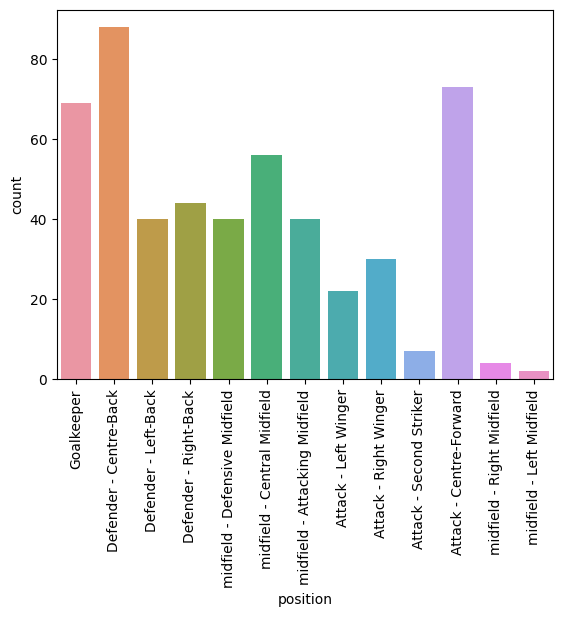

In [222]:
sns.countplot(x='position',data=df)
plt.xticks(rotation=90);

In [223]:
df.groupby('nationality').mean()

C:\Users\Afriduzzaman.afridi\AppData\Local\Temp\ipykernel_996\429155089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('nationality').mean()


,age,height,price,max_price,shirt_nr
nationality,,,,,
Albania,18.000000,1.940000,0.200000,0.250000,41.0
Algeria,28.000000,1.870000,20.000000,22.000000,25.0
Argentina,24.000000,1.770000,15.000000,25.000000,25.0
Argentina Italy,30.000000,1.850000,4.000000,20.000000,21.0
Armenia,29.000000,1.840000,2.000000,5.000000,23.0
...,...,...,...,...,...
United States France,27.000000,1.910000,9.000000,10.000000,45.0
United States Germany,27.333333,1.883333,2.066667,7.666667,23.0
United States Portugal,20.000000,1.850000,28.000000,42.000000,7.0


Lets check the corr between Nationality and price

<Axes: xlabel='foot', ylabel='count'>

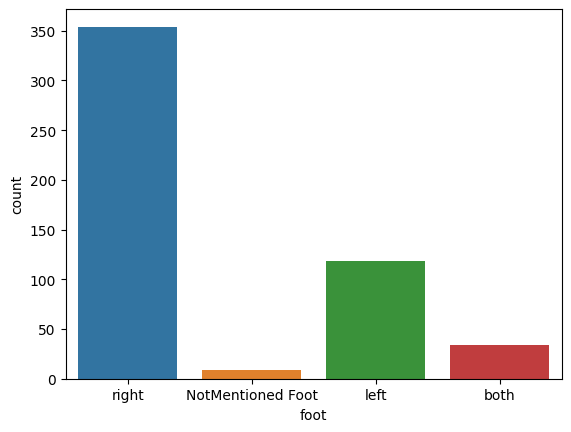

In [229]:
sns.countplot(x='foot', data=df)

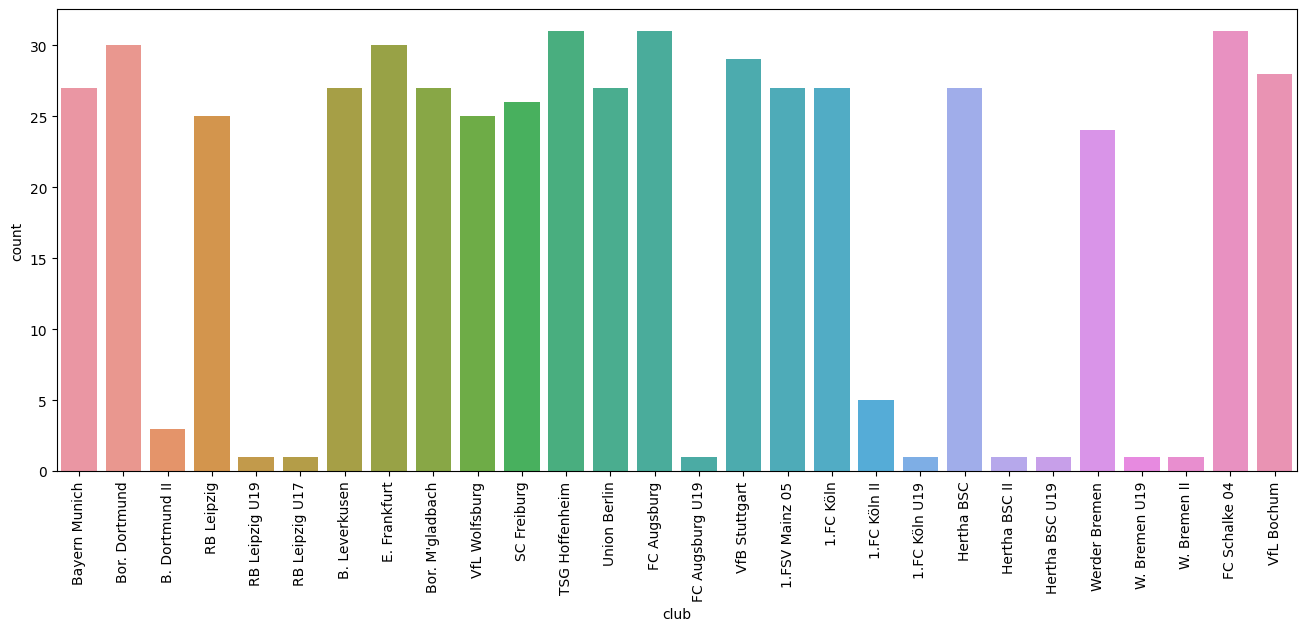

In [233]:
plt.figure(figsize=(16,6))
sns.countplot(x='club', data=df)
plt.xticks(rotation=90);

<Axes: xlabel='contract_expires', ylabel='count'>

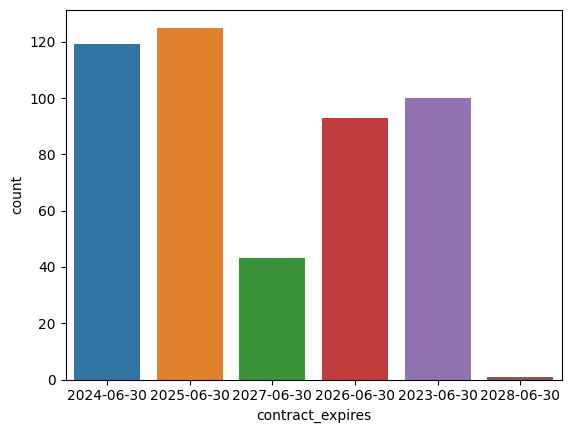

In [234]:
sns.countplot(x='contract_expires',data=df)

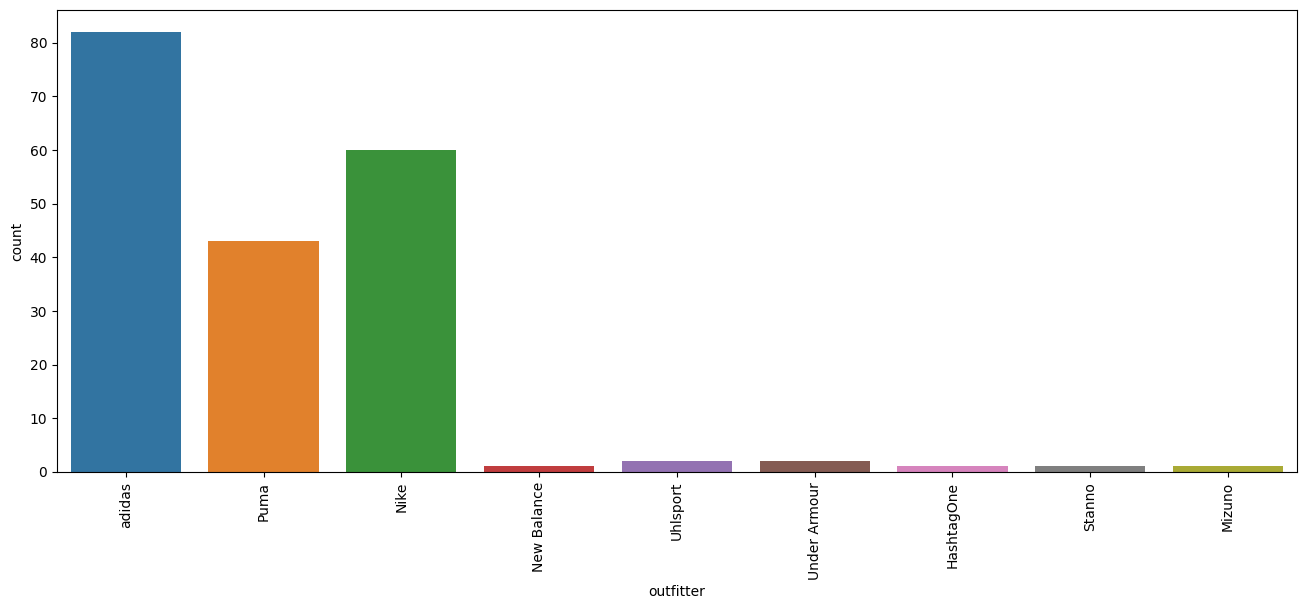

In [236]:
plt.figure(figsize=(16,6))
sns.countplot(x='outfitter', data=df)
plt.xticks(rotation=90);

In [237]:
df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,Yann Sommer,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,Sven Ulreich,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NotMentioned Foot,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [239]:
df['contract_duration'] = pd.to_datetime(df['contract_expires']) - pd.to_datetime(df['joined_club'])

In [247]:
def modify_day(str):
    return str.split(' ')[0]

In [250]:
df['contract_duration'] = df['contract_duration'].astype(str)

In [251]:
df['contract_duration'] = df['contract_duration'].apply( lambda x:modify_day(x))

<Axes: xlabel='age', ylabel='price'>

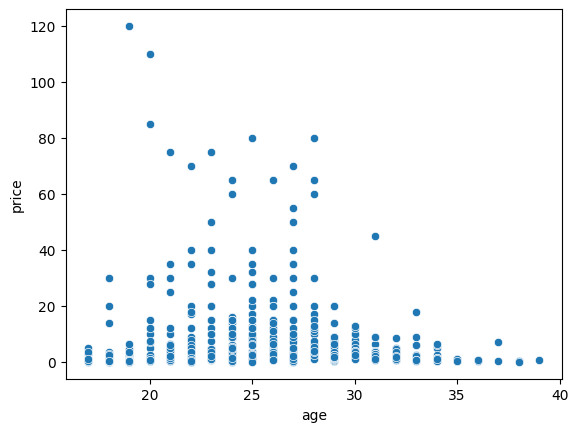

In [257]:
sns.scatterplot( x= 'age', y='price', data=df)

<Axes: xlabel='age', ylabel='max_price'>

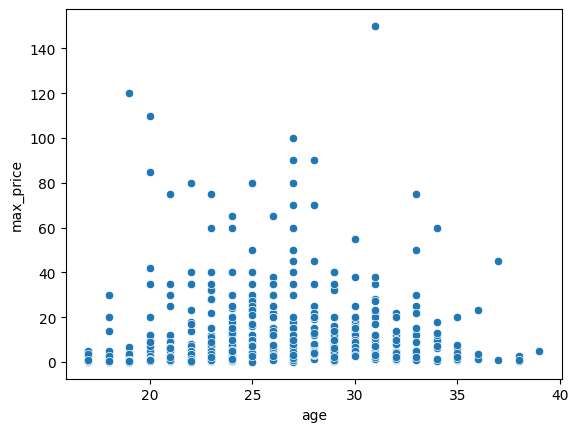

In [258]:
sns.scatterplot( x= 'age', y='max_price', data=df)

<Axes: xlabel='foot', ylabel='price'>

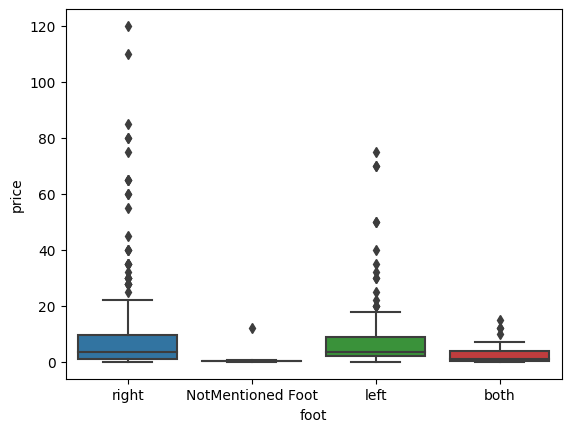

In [259]:
sns.boxplot(x='foot', y='price', data=df)

<Axes: xlabel='foot', ylabel='max_price'>

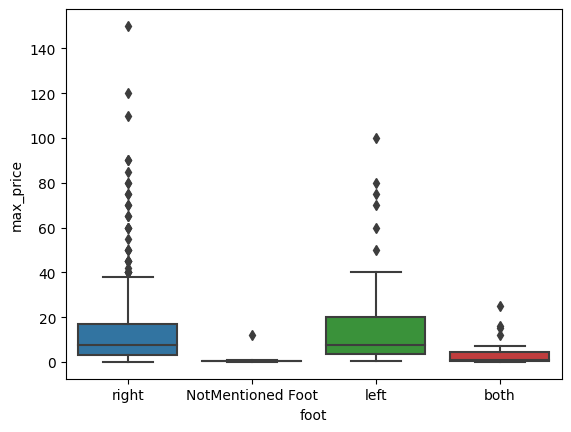

In [260]:
sns.boxplot(x='foot', y='max_price', data=df)